In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize 
import matplotlib

In [3]:
def g_x(x):
    y = np.zeros(x.shape[0])
 
    
    bool_cond = np.where((x < -1) | (x > 1))
    y[bool_cond] = 0
    
    bool_function = np.where((x >= -1) & (x <= 1))
    y[bool_function] = 1 - x[bool_function]**2
    
    return y

def constant_finder(dydx, x_value):
    b = -dydx * x_value
    return b


def function_to_plot(dydx, b, array):
    t = dydx*array + np.ones(array.shape[0])*b
    return t
        
    

In [4]:
x_fine = np.linspace(-2,2,100)
x_domain = np.array([-2, -1.5, -1, -0.75, -0.5 , -0.25, 0, 0.25, 0.5, 0.75, 1, 1.5, 2])
y = g_x(x_domain)
dtdx = 1 / y

dtdx = np.where(dtdx==np.infty, 0, dtdx) # anywhere infity, replace with 0, for dtdx array

dtdx = dtdx[dtdx != 0] # remove zeros


constants = constant_finder(dtdx, x_domain[3:-3])
solution_set = []

# y_1 = function_to_plot(dtdx[0], constants[0],x_fine)
# y_2 = function_to_plot(dtdx[1], constants[1],x_fine)
# y_3 = function_to_plot(dtdx[2], constants[2],x_fine)

solution_set = [function_to_plot(dtdx[i], constants[i],x_fine) for i in range(0,dtdx.shape[0])]


C:\Users\adamc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [29]:
def solveme(x):
    return (dtdx[-1]*x + constants[-1]) - (dtdx[-2]*x + constants[-2])

intersection = scipy.optimize.fsolve(solveme, 1, full_output=True)
x_solution = intersection[0]
y_solution = dtdx[-1]*intersection[0] + constants[-1]

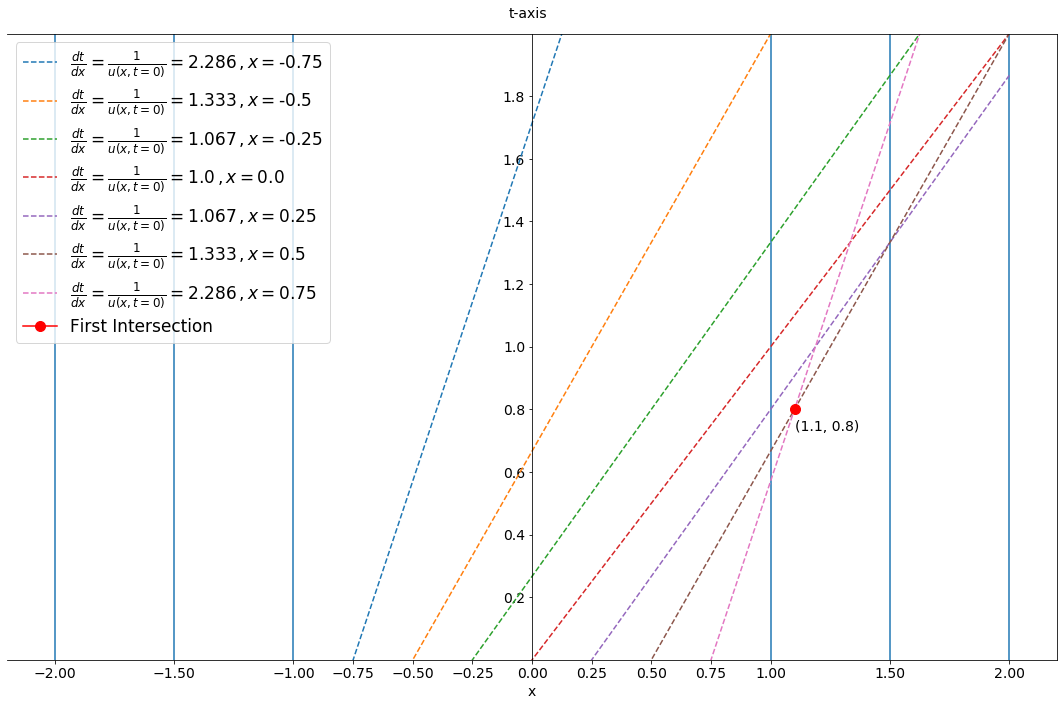

In [74]:
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(ncols=1, figsize=(15,10))
ax.axvline(x=-2, ymin=0, ymax=1)
ax.axvline(x=-1.5, ymin=0, ymax=1)
ax.axvline(x=-1, ymin=0, ymax=1)
ax.axvline(x=1, ymin=0, ymax=1)
ax.axvline(x=1.5, ymin=0, ymax=1)
ax.axvline(x=2, ymin=0, ymax=1)
# plt.plot(x_fine, g_x(x_fine), linestyle='dashed')

for i in range(0,dtdx.shape[0]):
    label = r'$\frac{dt}{dx} = \frac{1}{u(x,t=0)} =$' + str(round(dtdx[i],3)) + r'$\/, x=$'
    tl= r'$x_{1_3}$'
    plt.plot(x_fine, solution_set[i], linestyle='dashed', label=label +str(x_domain[i+3]))
#     plt.plot(x_fine, solution_set[i], linestyle='dashed', label=label)

ax.plot(x_solution, y_solution, marker='o', markersize=10, color='red',label='First Intersection')
plt.text(1.1, 0.73, f'({round(x_solution[0],1)}, {round(y_solution[0],1)})', fontsize=14)

ax.set_yticks(np.arange(0.2,2,0.2))
ax.set_ylim(0,2)
ax.set_xticks(x_domain)
ax.legend(fontsize=17)
ax.set_xlabel('x')
plt.text(-0.1,2.05, 't-axis')
ax.spines['left'].set_position('center')

plt.tight_layout()
plt.savefig('Characteristic_Curves.pdf')
# ax.spines['right'].set_color('none')
# ax.spines['bottom'].set_position('center')
# ax.spines['top'].set_color('none')